<a href="https://colab.research.google.com/github/KavehKadkhoda/Sentiment-Analysis/blob/main/11_auto_correct_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Autocorrect

Welcome to the first assignment of Course 2. This assignment will give you a chance to brush up on your python and probability skills. In doing so, you will implement an auto-correct system that is very effective and useful.

## Outline
- [0. Overview](#0)
    - [0.1 Edit Distance](#0-1)
- [1. Data Preprocessing](#1)
    - [1.1 Exercise 1](#ex-1)
    - [1.2 Exercise 2](#ex-2)
    - [1.3 Exercise 3](#ex-3)
- [2. String Manipulation](#2)
    - [2.1 Exercise 4](#ex-4)
    - [2.2 Exercise 5](#ex-5)
    - [2.3 Exercise 6](#ex-6)
    - [2.4 Exercise 7](#ex-7)
- [3. Combining the edits](#3)
    - [3.1 Exercise 8](#ex-8)
    - [3.2 Exercise 9](#ex-9)
    - [3.3 Exercise 10](#ex-10)
- [4. Minimum Edit Distance](#4)
    - [4.1 Exercise 11](#ex-11)
- [5. Backtrace (Optional)](#5)

<a name='0'></a>
## 0. Overview

You use autocorrect every day on your cell phone and computer. In this assignment, you will explore what really goes on behind the scenes. Of course, the model you are about to implement is not identical to the one used in your phone, but it is still quite good. 

By completing this assignment you will learn how to: 

- Get a word count given a corpus
- Get a word probability in the corpus 
- Manipulate strings 
- Filter strings 
- Implement Minimum edit distance to compare strings and to help find the optimal path for the edits. 
- Understand how dynamic programming works


Similar systems are used everywhere. 
- For example, if you type in the word **"I am lerningg"**, chances are very high that you meant to write **"learning"**, as shown in **Figure 1**. 

<a name='0-1'></a>
#### 0.1 Edit Distance

In this assignment, you will implement models that correct words that are 1 and 2 edit distances away. 
- We say two words are n edit distance away from each other when we need n edits to change one word into another. 

An edit could consist of one of the following options: 

- Delete (remove a letter): ‘hat’ => ‘at, ha, ht’
- Switch (swap 2 adjacent letters): ‘eta’ => ‘eat, tea,...’
- Replace (change 1 letter to another): ‘jat’ => ‘hat, rat, cat, mat, ...’
- Insert (add a letter): ‘te’ => ‘the, ten, ate, ...’

You will be using the four methods above to implement an Auto-correct. 
- To do so, you will need to compute probabilities that a certain word is correct given an input. 

This auto-correct you are about to implement was first created by [Peter Norvig](https://en.wikipedia.org/wiki/Peter_Norvig) in 2007. 
- His [original article](https://norvig.com/spell-correct.html) may be a useful reference for this assignment.

The goal of our spell check model is to compute the following probability:

$$P(c|w) = \frac{P(w|c)\times P(c)}{P(w)} \tag{Eqn-1}$$

The equation above is [Bayes Rule](https://en.wikipedia.org/wiki/Bayes%27_theorem). 
- Equation 1 says that the probability of a word being correct $P(c|w) $is equal to the probability of having a certain word $w$, given that it is correct $P(w|c)$, multiplied by the probability of being correct in general $P(C)$ divided by the probability of that word $w$ appearing $P(w)$ in general.
- To compute equation 1, you will first import a data set and then create all the probabilities that you need using that data set.

<a name='1'></a>
# Part 1: Data Preprocessing 

In [3]:
import re
from collections import Counter
import numpy as np
import pandas as pd



As in any other machine learning task, the first thing you have to do is process your data set. 
- Many courses load in pre-processed data for you. 
- However, in the real world, when you build these NLP systems, you load the datasets and process them.
- So let's get some real world practice in pre-processing the data!

Your first task is to read in a file called **'shakespeare.txt'** which is found in your file directory. To look at this file you can go to `File ==> Open `. 

<a name='ex-1'></a>
### Exercise 1
Implement the function `process_data` which 

1) Reads in a corpus (text file)

2) Changes everything to lowercase

3) Returns a list of words. 

In [4]:
#Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser.
#https://colab.research.google.com

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# UNQ_C1 GRADED FUNCTION: process_data
def process_data(file_name):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = [] # return this variable correctly

    ### START CODE HERE ### 
    
    # Open the file, read its contents into a string variable
    # f = open(file_name, 'r')
    # convert all letters to lower case
    data = file_name.read().lower()
    #Convert every word to lower case and return them in a list.
    words = re.findall('\w+', data)
    ### END CODE HERE ###
    
    return words

Note, in the following cell, 'words' is converted to a python `set`. This eliminates any duplicate entries.

In [6]:
#DATA: Add shortcut to your google drive

#shakespeare.txt :
#https://drive.google.com/file/d/1pW_Z9h09-MjSn9u9B8IcZZ-d5R8DDFla/view?usp=sharing

# Load a 3 columns csv file using pandas function
shakespeare_text = open('drive/MyDrive/NLP/shakespeare.txt', "r") 



#DO NOT MODIFY THIS CELL
word_l = process_data(shakespeare_text)
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")


The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


#### Expected Output
```Python
The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.
```

<a name='ex-2'></a>
### Exercise 2

Implement a `get_count` function that returns a dictionary
- The dictionary's keys are words
- The value for each word is the number of times that word appears in the corpus. 

For example, given the following sentence: **"I am happy because I am learning"**, your dictionary should return the following: 
<table style="width:20%">

  <tr>
    <td> <b>Key </b>  </td>
    <td> <b>Value </b> </td> 


  </tr>
  <tr>
    <td> I  </td>
    <td> 2</td> 
 
  </tr>
   
  <tr>
    <td>am</td>
    <td>2</td> 
  </tr>

  <tr>
    <td>happy</td>
    <td>1</td> 
  </tr>
  
   <tr>
    <td>because</td>
    <td>1</td> 
  </tr>
  
   <tr>
    <td>learning</td>
    <td>1</td> 
  </tr>
</table>


**Instructions**: 
Implement a `get_count` which returns a dictionary where the key is a word and the value is the number of times the word appears in the list.  


In [7]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C2 GRADED FUNCTION: get_count
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    
    word_count_dict = {}  # fill this with word counts
    ### START CODE HERE 
    
    #solution_1:
    #word_count_dic = Counter(word_l)
    
    #solution_2:
    for word in word_l:
        if word in word_count_dict:
            word_count_dict[word] += 1
        else:
            word_count_dict[word] = 1
    
    ### END CODE HERE ### 
    return word_count_dict

In [8]:
#DO NOT MODIFY THIS CELL
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


#### Expected Output
```Python
There are 6116 key values pairs
The count for the word 'thee' is 240
```

<a name='ex-3'></a>
### Exercise 3
Given the dictionary of word counts, compute the probability that each word will appear if randomly selected from the corpus of words.

$$P(w_i) = \frac{C(w_i)}{M} \tag{Eqn-2}$$
where 

$C(w_i)$ is the total number of times $w_i$ appears in the corpus.

$M$ is the total number of words in the corpus.

For example, the probability of the word 'am' in the sentence **'I am happy because I am learning'** is:

$$P(am) = \frac{C(w_i)}{M} = \frac {2}{7} \tag{Eqn-3}.$$

**Instructions:** Implement `get_probs` function which gives you the probability 
that a word occurs in a sample. This returns a dictionary where the keys are words, and the value for each word is its probability in the corpus of words.

In [9]:
# UNQ_C3 GRADED FUNCTION: get_probs
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {}  # return this variable correctly
    
    ### START CODE HERE ###
    
    # get the total count of words for all words in the dictionary
    words_count = sum(word_count_dict.values())
    for key in word_count_dict.keys():
        probs[key] = word_count_dict[key] / words_count
    
    ### END CODE HERE ###
    return probs

In [10]:
#DO NOT MODIFY THIS CELL
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045


#### Expected Output

```Python
Length of probs is 6116
P('thee') is 0.0045
```

<a name='2'></a>
# Part 2: String Manipulations

Now that you have computed $P(w_i)$ for all the words in the corpus, you will write a few functions to manipulate strings so that you can edit the erroneous strings and return the right spellings of the words. In this section, you will implement four functions: 

* `delete_letter`: given a word, it returns all the possible strings that have **one character removed**. 
* `switch_letter`: given a word, it returns all the possible strings that have **two adjacent letters switched**.
* `replace_letter`: given a word, it returns all the possible strings that have **one character replaced by another different letter**.
* `insert_letter`: given a word, it returns all the possible strings that have an **additional character inserted**. 


#### List comprehensions

String and list manipulation in python will often make use of a python feature called  [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). The routines below will be described as using list comprehensions, but if you would rather implement them in another way, you are free to do so as long as the result is the same. Further, the following section will provide detailed instructions on how to use list comprehensions and how to implement the desired functions. If you are a python expert, feel free to skip the python hints and move to implementing the routines directly.

Python List Comprehensions embed a looping structure inside of a list declaration, collapsing many lines of code into a single line. If you are not familiar with them, they seem slightly out of order relative to for loops. 

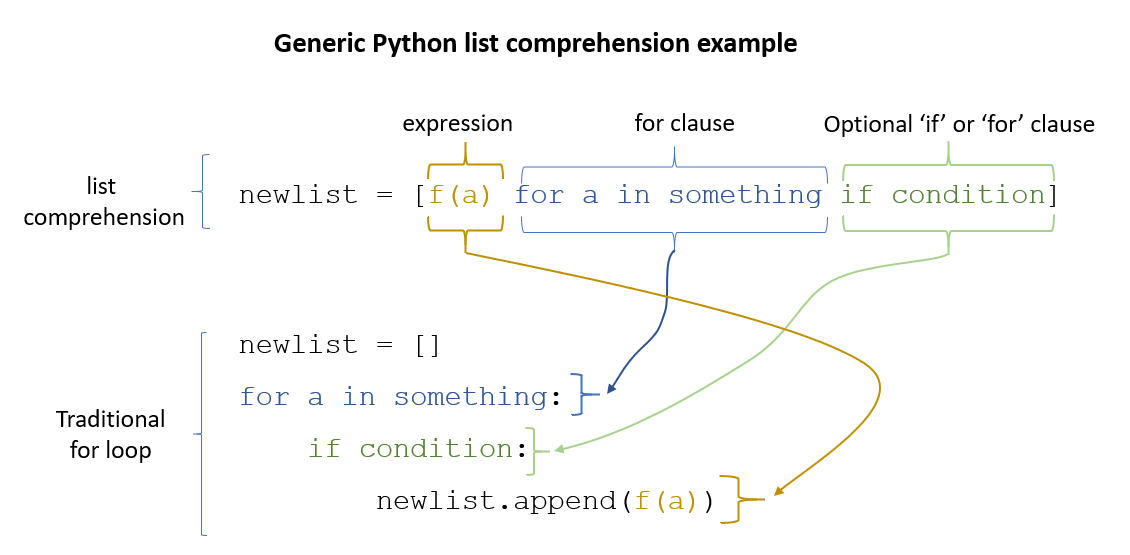

The diagram above shows that the components of a list comprehension are the same components you would find in a typical for loop that appends to a list, but in a different order. With that in mind, we'll continue the specifics of this assignment. We will be very descriptive for the first function, `deletes()`, and less so in later functions as you become familiar with list comprehensions.

<a name='ex-4'></a>
### Exercise 4

**Instructions for delete_letter():** Implement a `delete_letter()` function that, given a word, returns a list of strings with one character deleted. 

For example, given the word **nice**, it would return the set: {'ice', 'nce', 'nic', 'nie'}. 

**Step 1:** Create a list of 'splits'. This is all the ways you can split a word into Left and Right: For example,   
'nice is split into : `[('', 'nice'), ('n', 'ice'), ('ni', 'ce'), ('nic', 'e'), ('nice', '')]`
This is common to all four functions (delete, replace, switch, insert).

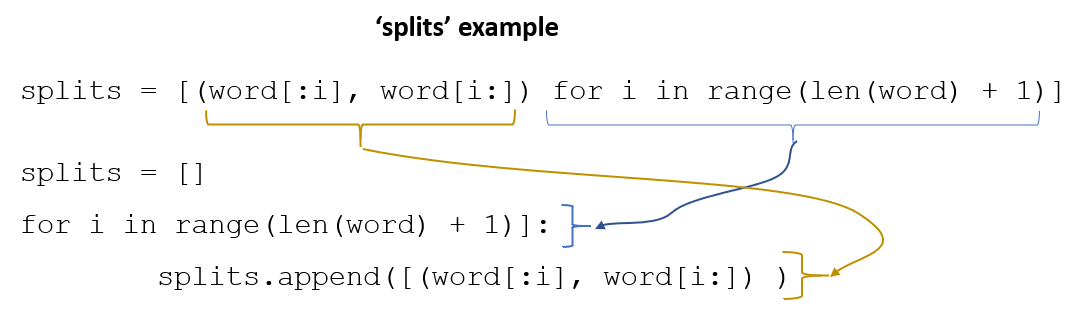

**Step 2:** This is specific to `delete_letter`. Here, we are generating all words that result from deleting one character.  
This can be done in a single line with a list comprehension. You can make use of this type of syntax:  
`[f(a,b) for a, b in splits if condition]`  

For our 'nice' example you get: 
['ice', 'nce', 'nie', 'nic']

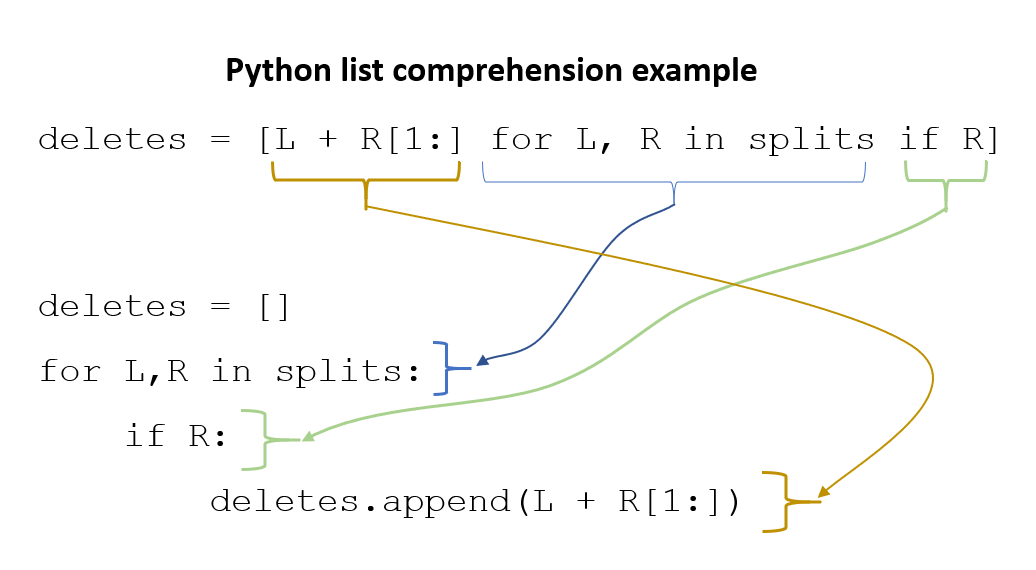

#### Levels of assistance

Try this exercise with these levels of assistance.  
- We hope that this will make it both a meaningful experience but also not a frustrating experience. 
- Start with level 1, then move onto level 2, and 3 as needed.

    - Level 1. Try to think this through and implement this yourself.
    - Level 2. Click on the "Level 2 Hints" section for some hints to get started.
    - Level 3. If you would prefer more guidance, please click on the "Level 3 Hints" cell for step by step instructions.
    
- If you are still stuck, look at the images in the "list comprehensions" section above.


In [11]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C4 GRADED FUNCTION: deletes
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    
    ### START CODE HERE ###
    
    #split_l = [(word[:i], word[i:]) for in in range(len(word))]
    #delete_l = [L + R[1:] for L, R in split_l if R]
    
    for i in range(len(word)):
        split_l.append((word[:i], word[i:]))
    
    for L, R in split_l:
        delete_l.append(L + R[1:])
    
    
    ### END CODE HERE ###

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return  delete_l

In [12]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


#### Expected Output
```CPP
Note: You might get a slightly different result with split_l

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']
```

#### Note 1
- Notice how it has the extra tuple `('cans', '')`.
- This will be fine as long as you have checked the size of the right-side substring in tuple (L,R).
- Can you explain why this will give you the same result for the list of deletion strings (delete_l)?

```CPP
input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can']
```

#### Note 2
If you end up getting the same word as your input word, like this:

```Python
input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can', 'cans']
```

- Check how you set the `range`.
- See if you check the length of the string on the right-side of the split.

In [13]:
# test # 2
print(f"Number of outputs of delete_letter('at') is {len(delete_letter('at'))}")

Number of outputs of delete_letter('at') is 2


#### Expected output

```CPP
Number of outputs of delete_letter('at') is 2
```

<a name='ex-5'></a>
### Exercise 5

**Instructions for switch_letter()**: Now implement a function that switches two letters in a word. It takes in a word and returns a list of all the possible switches of two letters **that are adjacent to each other**. 
- For example, given the word 'eta', it returns {'eat', 'tea'}, but does not return 'ate'.

**Step 1:** is the same as in delete_letter()  
**Step 2:** A list comprehension or for loop which forms strings by swapping adjacent letters. This is of the form:  
`[f(L,R) for L, R in splits if condition]`  where 'condition' will test the length of R in a given iteration. See below.

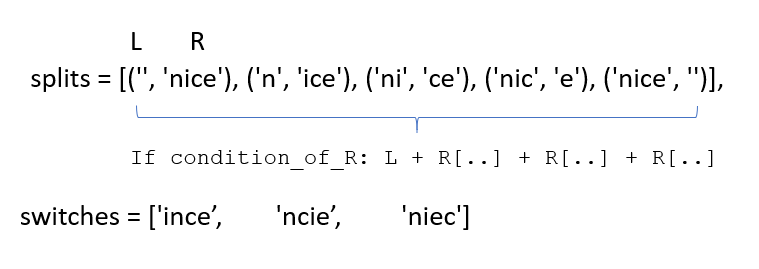

In [14]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C5 GRADED FUNCTION: switches
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    
    ### START CODE HERE ###
    #split_l = [(word[:i], word[i:]) for i in range(len(word))]
    
    len_word = len(word)
    for i in range(len_word):
        split_l.append((word[:i], word[i:]))
    switch_l = [L + R[1] + R[0] + R[2:] for L, R in split_l if len(R) >= 2]
    
    ### END CODE HERE ###
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 
    
    return switch_l

In [15]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


#### Expected output

```Python
Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']
```

In [16]:
# test # 2
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

Number of outputs of switch_letter('at') is 1


#### Expected output

```CPP
Number of outputs of switch_letter('at') is 1
```

<a name='ex-6'></a>
### Exercise 6
**Instructions for replace_letter()**: Now implement a function that takes in a word and returns a list of strings with one **replaced letter** from the original word. 

**Step 1:** is the same as in `delete_letter()`

**Step 2:** A list comprehension or for loop which form strings by replacing letters.  This can be of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]`   Note the use of the second for loop.  
It is expected in this routine that one or more of the replacements will include the original word. For example, replacing the first letter of 'ear' with 'e' will return 'ear'.

**Step 3:** Remove the original input letter from the output.

In [17]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C6 GRADED FUNCTION: replaces
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    
    replace_l = []
    split_l = []
    
    ### START CODE HERE ###
    
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    
    replace_l = [L + letter + (R[1:] if len(R) > 1 else '') for L, R in split_l if R for letter in letters] 
    replace_set = set(replace_l)
    replace_set.discard(word)
    
    ### END CODE HERE ###
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [18]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


#### Expected Output**: 
```Python
Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']
```
- Note how the input word 'can' should not be one of the output words.

In [19]:
# test # 2
print(f"Number of outputs of replace_letter('at') is {len(replace_letter('at'))}")

Number of outputs of replace_letter('at') is 50


#### Expected output
```CPP
Number of outputs of replace_letter('at') is 50
```

<a name='ex-7'></a>
### Exercise 7

**Instructions for insert_letter()**: Now implement a function that takes in a word and returns a list with a letter inserted at every offset.

**Step 1:** is the same as in `delete_letter()`

**Step 2:** This can be a list comprehension of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]` 

In [20]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C7 GRADED FUNCTION: inserts
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    
    ### START CODE HERE ###
    
    split_l = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    insert_l = [L + letter + R for L, R in split_l for letter in letters]
    
    ### END CODE HERE ###
    
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [21]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


#### Expected output

```Python
Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78
```

<a name='3'></a>

# Part 3: Combining the edits

Now that you have implemented the string manipulations, you will create two functions that, given a string, will return all the possible single and double edits on that string. These will be `edit_one_letter()` and `edit_two_letters()`.

<a name='3-1'></a>
## 3.1 Edit one letter

<a name='ex-8'></a>
### Exercise 8

**Instructions**: Implement the `edit_one_letter` function to get all the possible edits that are one edit away from a word. The edits  consist of the replace, insert, delete, and optionally the switch operation. You should use the previous functions you have already implemented to complete this function. The 'switch' function  is a less common edit function, so its use will be selected by an "allow_switches" input argument.

Note that those functions return *lists* while this function should return a *python set*. Utilizing a set eliminates any duplicate entries.

In [22]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C8 GRADED FUNCTION: edit_one_letter
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    
    ### START CODE HERE ###
    
    if allow_switches:
        edit_one_set = set( switch_letter(word) + insert_letter(word) + delete_letter(word) + replace_letter(word))
    else:
        edit_one_set = set( insert_letter(word) + delete_letter(word) + replace_letter(word))
    
    ### END CODE HERE ###
    
    # return this as a set and not a list
    return set(edit_one_set)

In [23]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


#### Expected Output
```CPP
input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129
```

<a name='3-2'></a>
## Part 3.2 Edit two letters

<a name='ex-9'></a>
### Exercise 9

Now you can generalize this to implement to get two edits on a word. To do so, you would have to get all the possible edits on a single word and then for each modified word, you would have to modify it again. 

**Instructions**: Implement the `edit_two_letters` function that returns a set of words that are two edits away. Note that creating additional edits based on the `edit_one_letter` function may 'restore' some one_edits to zero or one edits. That is allowed here. This is accounted for in get_corrections.

In [24]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C9 GRADED FUNCTION: edit_two_letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    
    ### START CODE HERE ###
    
    edit_one_set = edit_one_letter(word, allow_switches)
    for words in edit_one_set:
        edit_two_set = edit_two_set.union(edit_one_letter(words, allow_switches))
    
    ### END CODE HERE ###
    
    # return this as a set instead of a list
    return set(edit_two_set)

In [25]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


#### Expected Output

```CPP
Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154
```

<a name='3-3'></a>
## Part 3-3: suggest spelling suggestions

Now you will use your `edit_two_letters` function to get a set of all the possible 2 edits on your word. You will then use those strings to get the most probable word you meant to type a.k.a your typing suggestion.

<a name='ex-10'></a>
### Exercise 10
**Instructions**: Implement `get_corrections`, which returns a list of zero to n possible suggestion tuples of the form (word, probability_of_word). 

**Step 1:** Generate suggestions for a supplied word: You'll use the edit functions you have developed. The 'suggestion algorithm' should follow this logic: 
* If the word is in the vocabulary, suggest the word. 
* Otherwise, if there are suggestions from `edit_one_letter` that are in the vocabulary, use those. 
* Otherwise, if there are suggestions from `edit_two_letters` that are in the vocabulary, use those. 
* Otherwise, suggest the input word.*  
* The idea is that words generated from fewer edits are more likely than words with more edits.


Note: 
- Edits of one or two letters may 'restore' strings to either zero or one edit. This algorithm accounts for this by preferentially selecting lower distance edits first.

#### Short circuit
In Python, logical operations such as `and` and `or` have two useful properties. They can operate on lists and they have ['short-circuit' behavior](https://docs.python.org/3/library/stdtypes.html). Try these:

In [26]:
# example of logical operation on lists or sets
print( [] and ["a","b"] )
print( [] or ["c","d"] )
#example of Short circuit behavior
val1 =  ["Most","Likely"] or ["Less","so"] or ["least","of","all"]  # selects first, does not evalute remainder
print(val1)
val2 =  [] or [] or ["least","of","all"] # continues evaluation until there is a non-empty list
print(val2)

[]
['c', 'd']
['Most', 'Likely']
['least', 'of', 'all']


The logical `or` could be used to implement the suggestion algorithm very compactly. Alternately, if/then constructs could be used.
 
**Step 2**: Create a 'best_words' dictionary where the 'key' is a suggestion and the 'value' is the probability of that word in your vocabulary. If the word is not in the vocabulary, assign it a probability of 0.

**Step 3**: Select the n best suggestions. There may be fewer than n.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>edit_one_letter and edit_two_letters return *python sets*. </li>
    <li> Sets have a handy <a href="https://docs.python.org/2/library/sets.html" > set.intersection </a> feature</li>
    <li>To find the keys that have the highest values in a dictionary, you can use the Counter dictionary to create a Counter object from a regular dictionary.  Then you can use Counter.most_common(n) to get the n most common keys.
    </li>
    <li>To find the intersection of two sets, you can use set.intersection or the & operator.</li>
    <li>If you are not as familiar with short circuit syntax (as shown above), feel free to use if else statements instead.</li>
    <li>To use an if statement to check of a set is empty, use 'if not x:' syntax </li>
</ul>
</p>

In [27]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C10 GRADED FUNCTION: get_corrections
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
    ### START CODE HERE ###
    
    #Step 1: create suggestions as described above    
    #suggestions = list( (word in vocab and word) or edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab) )
    if word in vocab:
        suggestions.append(word)
    elif len(edit_one_letter(word).intersection(vocab)) > 0:
        suggestions = suggestions or list(edit_one_letter(word).intersection(vocab))
    elif len(edit_two_letter(word).intersection(vocab)) > 0:
        suggestions = suggestion or list(edit_one_letter(word).intersection(vocab))
                    
    #Step 2: determine probability of suggestions
    best_words = dict()
    for w in suggestions:
        if w in vocab:
            best_words[w] = probs[w]
        else:
            best_words[w] = 0
    
    #Step 3: Get all your best words and return the most probable top n_suggested words as n_best
    #n_best = [ [ws, prob[ws]] for ws in list(reversed(suggestions)) ]
    counter = Counter(best_words)
    n_best = counter.most_common(n)
    
    ### END CODE HERE ###
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [28]:
# Test your implementation - feel free to try other words in my word
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

entered word =  dys 
suggestions =  ['dye', 'days']
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>


#### Expected Output
- Note: This expected output is for `my_word = 'dys'`. Also, keep `verbose=True`
```CPP
entered word =  dys 
suggestions =  {'days', 'dye'}
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>
```

<a name='4'></a>
# Part 4: Minimum Edit distance

Now that you have implemented your auto-correct, how do you evaluate the similarity between two strings? For example: 'waht' and 'what'

Also how do you efficiently find the shortest path to go from the word, 'waht' to the word 'what'?

You will implement a dynamic programming system that will tell you the minimum number of edits required to convert a string into another string.

<a name='4-1'></a>
### Part 4.1 Dynamic Programming

Dynamic Programming breaks a problem down into subproblems which can be combined to form the final solution. Here, given a string source[0..i] and a string target[0..j], we will compute all the combinations of substrings[i, j] and calculate their edit distance. To do this efficiently, we will use a table to maintain the previously computed substrings and use those to calculate larger substrings.

You have to create a matrix and update each element in the matrix as follows:  

$$\text{Initialization}$$

\begin{align}
D[0,0] &= 0 \\
D[i,0] &= D[i-1,0] + del\_cost(source[i]) \tag{4}\\
D[0,j] &= D[0,j-1] + ins\_cost(target[j]) \\
\end{align}


$$\text{Per Cell Operations}$$
\begin{align}
 \\
D[i,j] =min
\begin{cases}
D[i-1,j] + del\_cost\\
D[i,j-1] + ins\_cost\\
D[i-1,j-1] + \left\{\begin{matrix}
rep\_cost; & if src[i]\neq tar[j]\\
0 ; & if src[i]=tar[j]
\end{matrix}\right.
\end{cases}
\tag{5}
\end{align}

So converting the source word **play** to the target word **stay**, using an input cost of one, a delete cost of 1, and replace cost of 2 would give you the following table:
<table style="width:20%">

  <tr>
    <td> <b> </b>  </td>
    <td> <b># </b>  </td>
    <td> <b>s </b>  </td>
    <td> <b>t </b> </td> 
    <td> <b>a </b> </td> 
    <td> <b>y </b> </td> 
  </tr>
   <tr>
    <td> <b>  #  </b></td>
    <td> 0</td> 
    <td> 1</td> 
    <td> 2</td> 
    <td> 3</td> 
    <td> 4</td> 
 
  </tr>
  <tr>
    <td> <b>  p  </b></td>
    <td> 1</td> 
 <td> 2</td> 
    <td> 3</td> 
    <td> 4</td> 
   <td> 5</td>
  </tr>
   
  <tr>
    <td> <b> l </b></td>
    <td>2</td> 
    <td>3</td> 
    <td>4</td> 
    <td>5</td> 
    <td>6</td>
  </tr>

  <tr>
    <td> <b> a </b></td>
    <td>3</td> 
     <td>4</td> 
     <td>5</td> 
     <td>4</td>
     <td>5</td> 
  </tr>
  
   <tr>
    <td> <b> y </b></td>
    <td>4</td> 
      <td>5</td> 
     <td>6</td> 
     <td>5</td>
     <td>4</td> 
  </tr>
  

</table>

The operations used in this algorithm are 'insert', 'delete', and 'replace'. These correspond to the functions that you defined earlier: insert_letter(), delete_letter() and replace_letter(). switch_letter() is not used here.

The diagram below describes how to initialize the table. Each entry in D[i,j] represents the minimum cost of converting string source[0:i] to string target[0:j]. The first column is initialized to represent the cumulative cost of deleting the source characters to convert string "EER" to "". The first row is initialized to represent the cumulative cost of inserting the target characters to convert from "" to "NEAR".

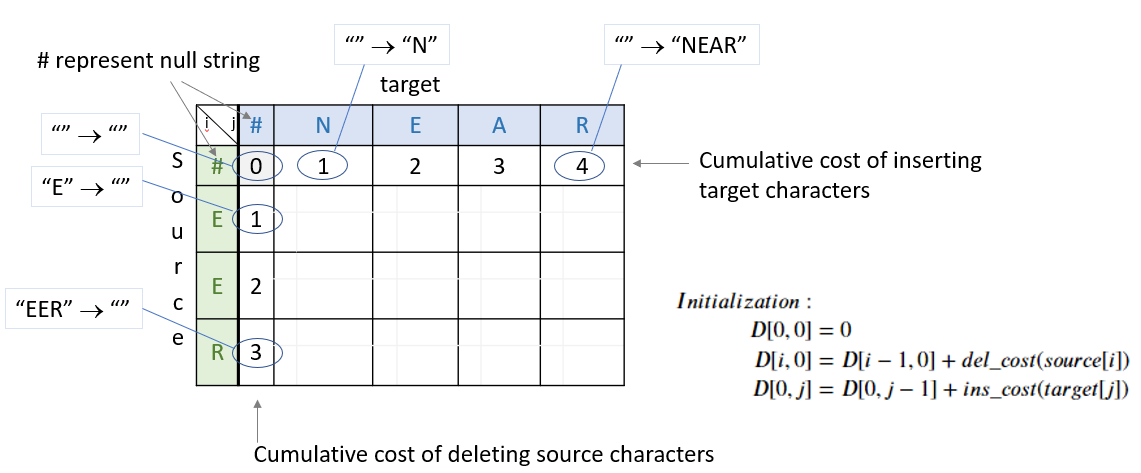

Filling in the remainder of the table utilizes the 'Per Cell Operations' in the equation (5) above. Note, the diagram below includes in the table some of the 3 sub-calculations shown in light grey. Only 'min' of those operations is stored in the table in the `min_edit_distance()` function.

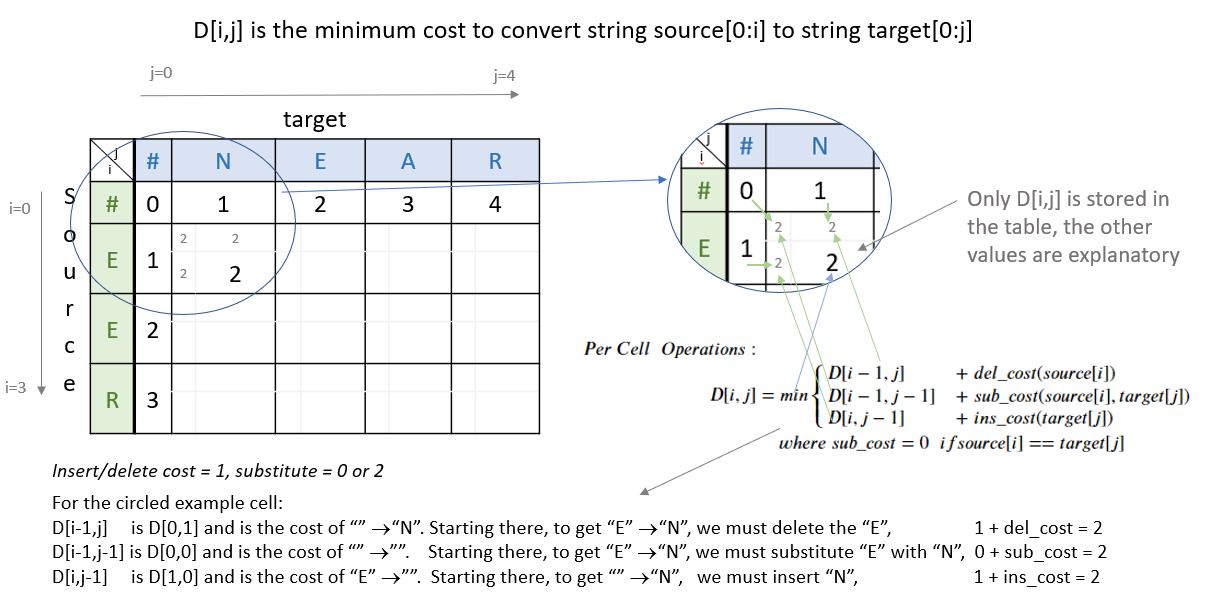

Note that the formula for $D[i,j]$ shown in the image is equivalent to:

\begin{align}
 \\
D[i,j] =min
\begin{cases}
D[i-1,j] + del\_cost\\
D[i,j-1] + ins\_cost\\
D[i-1,j-1] + \left\{\begin{matrix}
rep\_cost; & if src[i]\neq tar[j]\\
0 ; & if src[i]=tar[j]
\end{matrix}\right.
\end{cases}
\tag{5}
\end{align}

The variable `sub_cost` (for substitution cost) is the same as `rep_cost`; replacement cost.  We will stick with the term "replace" whenever possible.

Below are some examples of cells where replacement is used. This also shows the minimum path from the lower right final position where "EER" has been replaced by "NEAR" back to the start. This provides a starting point for the optional 'backtrace' algorithm below.

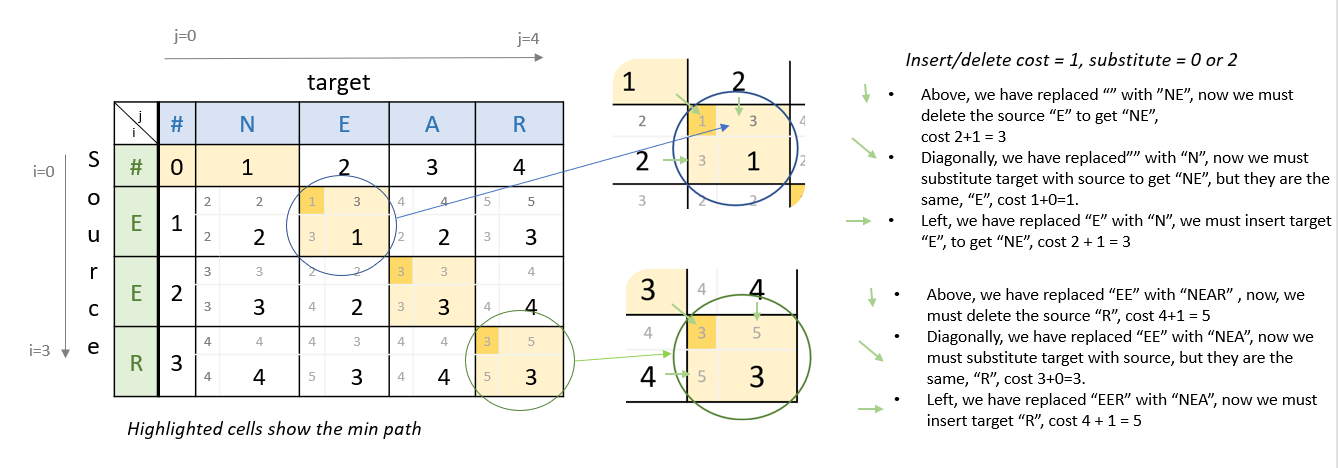

<a name='ex-11'></a>
### Exercise 11

Again, the word "substitution" appears in the figure, but think of this as "replacement".

In [29]:
# UNQ_C11 GRADED FUNCTION: min_edit_distance
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input: 
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    # use deletion and insert cost as  1
    m = len(source) 
    n = len(target) 
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Fill in column 0, from row 1 to row m, both inclusive
    #for row in range(1, m + 1): # Replace None with the proper range
    #    D[row,0] = row
    for row in range(1, m + 1):
        D[row, 0] = D[row - 1, 0] + del_cost
    # Fill in row 0, for all columns from 1 to n, both inclusive
    #for col in range(1, n + 1): # Replace None with the proper range
    #   D[0,col] = col
    for col in range(1, n + 1):
        D[0, col] = D[0, col - 1] + ins_cost
        
    # Loop through row 1 to row m, both inclusive
    for row in range(1, m + 1):
        
        # Loop through column 1 to column n, both inclusive
        for col in range(1, n + 1):
            
            # Intialize r_cost to the 'replace' cost that is passed into this function
            r_cost = rep_cost
            
            # Check to see if source character at the previous row
            # matches the target character at the previous column, 
            if source[row - 1] == target[col - 1]: # Replace None with a proper comparison
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0
                
            # Update the cost at row, col based on previous entries in the cost matrix
            # Refer to the equation calculate for D[i,j] (the minimum of three calculated costs)
            D[row,col] = min((D[row - 1, col] + del_cost), (D[row, col - 1] + ins_cost), (D[row - 1, col - 1] + r_cost))
            
    # Set the minimum edit distance with the cost found at row m, column n 
    med = D[m, n]
    
    ### END CODE HERE ###
    return D, med

In [30]:
#DO NOT MODIFY THIS CELL
# testing your implementation 
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  4 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


**Expected Results:**  

```CPP
minimum edits:  4
    
   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4
```

In [31]:
#DO NOT MODIFY THIS CELL
# testing your implementation 
source =  'eer'
target = 'near'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list(source)
idx.insert(0, '#')
cols = list(target)
cols.insert(0, '#')
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  3 

   #  n  e  a  r
#  0  1  2  3  4
e  1  2  1  2  3
e  2  3  2  3  4
r  3  4  3  4  3


**Expected Results**  
```CPP
minimum edits:  3 

   #  n  e  a  r
#  0  1  2  3  4
e  1  2  1  2  3
e  2  3  2  3  4
r  3  4  3  4  3
```